# Task Description : 
Develop a Generalized Linear regression model to predict the **Internal energy (U) of saturated vapor** for the given **pressure data (P)** **(see in code line 2)**. Please keep in mind the following:


*   1 bonus point - **(functioning model)** and 1 bonus point - **(top 5 models)**.
*   Submission Deadline is **May 26, 23:59**.
*   Please submit only .ipynb file for consistency.
*   Donot copy code from other students otherwise you will not be graded.
*   Try to write the code cleanly and only write what is asked in the final submission file.





*We expect you to upload only 'one' python file with name ***Exercise_3_Task_yourname*** on elearning in exactly the same format as explained below.*

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error        # to be used for regression model
from sklearn.metrics import r2_score 
from sklearn.model_selection import LeaveOneOut
from tqdm.notebook import tqdm
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
%matplotlib inline
#you can import more libraries if required

In [22]:
# upload data here
data = pd.read_csv("https://raw.githubusercontent.com/kennysmart1/Machine_Learning_2023_OVGU/main/Class%20Tasks/Data_superheated_vapor_training.csv")
data.head()

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,H,29.3350,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.6000,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
1,10.0,U,191.8220,2438.0000,2479.7000,2515.6000,2551.6000,2588.0000,2624.5000,2661.4000,...,NaN,3049.8000,NaN,3132.3000,NaN,3216.6000,NaN,3302.6000,NaN,3390.3000
2,10.0,H,191.8320,2584.8000,2640.0000,2687.5000,2735.2000,2783.1000,2831.2000,2879.6000,...,NaN,3383.5000,NaN,3489.1000,NaN,3596.5000,NaN,3705.5000,NaN,3816.3000
3,10.0,S,0.6493,8.1511,8.3168,8.4486,8.5722,8.6888,8.7994,8.9045,...,NaN,9.7572,NaN,9.8984,NaN,10.0329,NaN,10.1616,NaN,10.2849
4,20.0,U,251.4320,2456.9000,2478.4000,2514.6000,2550.9000,2587.4000,2624.1000,2661.0000,...,NaN,3049.7000,NaN,3132.3000,NaN,3216.5000,NaN,3302.5000,NaN,3390.2000


In [23]:
# perform data cleaning if required and define corresponding variables for [inputs /features]  and [corresponding output (Experimental values)]
# Please note: Input/Feature is Pressure and Output is Internal Energy for saturated vapor

perform data cleaning if required and define corresponding variables for [inputs /features]  and [corresponding output (Experimental values)]
Please note: Input/Feature is Pressure and Output is Internal Energy for saturated vapor

In [24]:
U_data = data.loc[data['Property'] == 'U']
U_data

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
1,10.0,U,191.822,2438.0,2479.7,2515.6,2551.6,2588.0,2624.5,2661.4,...,NaN,3049.8,NaN,3132.3,NaN,3216.6,NaN,3302.6,NaN,3390.3
4,20.0,U,251.432,2456.9,2478.4,2514.6,2550.9,2587.4,2624.1,2661.0,...,NaN,3049.7,NaN,3132.3,NaN,3216.5,NaN,3302.5,NaN,3390.2
8,30.0,U,289.271,2468.6,2477.1,2513.6,2550.2,2586.8,2623.6,2660.7,...,NaN,3049.6,NaN,3132.2,NaN,3216.5,NaN,3302.5,NaN,3390.2
15,50.0,U,340.513,2484.0,NaN,2511.7,2548.6,2585.6,2622.7,2659.9,...,NaN,3049.4,NaN,3132.0,NaN,3216.3,NaN,3302.3,NaN,3390.1
18,75.0,U,384.374,2496.7,NaN,2509.2,2546.7,2584.2,2621.6,2659.0,...,NaN,3049.2,NaN,3131.8,NaN,3216.1,NaN,3302.2,NaN,3389.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,10600.0,U,1418.100,2539.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2884.5,2939.1,2991.1,3041.4,3090.7,3139.3,3187.5,3235.6,3283.6,3331.7
449,10800.0,U,1426.200,2536.2,NaN,NaN,NaN,NaN,NaN,NaN,...,2881.7,2936.7,2989.0,3039.6,3089.0,3137.8,3186.1,3234.3,3282.4,3330.6
451,11000.0,U,1434.200,2533.2,NaN,NaN,NaN,NaN,NaN,NaN,...,2878.9,2934.3,2986.9,3037.7,3087.3,3136.2,3184.7,3233.0,3281.2,3329.5
455,11200.0,U,1442.100,2530.3,NaN,NaN,NaN,NaN,NaN,NaN,...,2876.0,2931.8,2984.8,3035.8,3085.6,3134.7,3183.3,3231.7,3280.0,3328.4


In [25]:
P = U_data["Pressure"]
U = U_data["Vap_Sat"]
X = np.array(P).reshape(-1,1)
y = np.array(U).reshape(-1,1)

Text(0, 0.5, 'Specific internal energy [$kJ kg^{-1}$]')

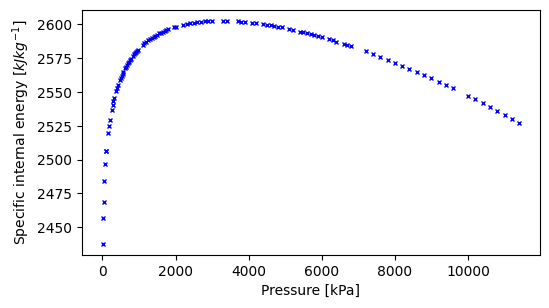

In [26]:
# Plot saturated liquid
plt.figure(figsize=(13, 7))
plt.subplot(222)
plt.plot(X, y, 'bx', markersize=3)
plt.xlabel('Pressure [kPa]')
plt.ylabel('Specific internal energy [$kJ kg^{-1}$]')

In [27]:
# do cross validation with different values of degree of polynomial and visualize (R2_square vs degree of polynomial and MSE vs degree of polynomial) to know what 'degree of polynomial' value performs best on your testing data.

do cross validation with different values of degree of polynomial and visualize (R2_square vs degree of polynomial and MSE vs degree of polynomial) to know what 'degree of polynomial' value performs best on your testing data.

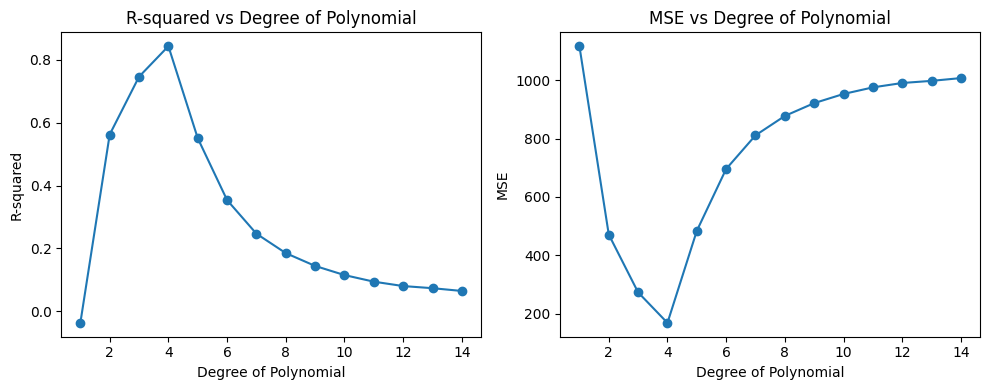

In [28]:
# Define the degrees of polynomial to try
degrees = range(1, 15)

# Lists to store R-squared and MSE values
r2_scores = []
mse_scores = []

# Perform leave-one-out cross-validation for each degree
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Perform leave-one-out cross-validation
    loo = LeaveOneOut()
    y_true, y_pred = [], []
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Perform linear regression
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Make predictions
        y_true.append(y_test[0])
        y_pred.append(model.predict(X_test)[0])
    
    # Calculate R-squared and MSE
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    r2_scores.append(r2)
    mse_scores.append(mse)

# Plot R-squared scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(degrees, r2_scores, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R-squared')
plt.title('R-squared vs Degree of Polynomial')

# Plot MSE scores
plt.subplot(1, 2, 2)
plt.plot(degrees, mse_scores, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.title('MSE vs Degree of Polynomial')

plt.tight_layout()
plt.show()


In [29]:
# train your final model using all the data points with your 'degree of polynomial value (Please do not calculate any performance metrics, we will do that on our own by checking performance of your model on our testing dataset)

 train your final model using all the data points with your 'degree of polynomial value (Please do not calculate any performance metrics, we will do that on our own by checking performance of your model on our testing dataset)

Pipeline(steps=[('pf', PolynomialFeatures(degree=4)), ('ss', StandardScaler()),
                ('LR', LinearRegression())])


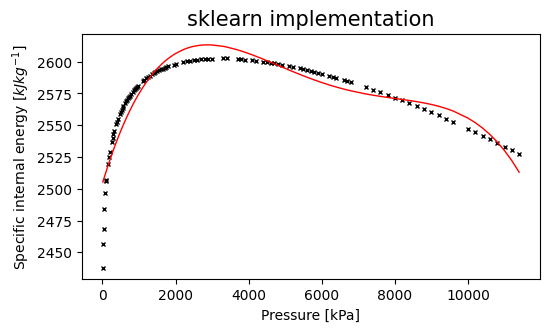

Parameters:  [[   0.          320.61100056 -965.7682721  1097.35259135 -446.95048633]]
Intercept :  [2571.27909091]


In [30]:
# set the degree that performed best during cross-validation, degree=4

pf = PolynomialFeatures(degree=4, include_bias=True)
LR = LinearRegression()
ss = StandardScaler()

# Define pipeline
PR_sklearn = Pipeline([("pf", pf), ("ss", ss), ("LR", LR),])
print(PR_sklearn)
PR_sklearn.fit(X, y)

# Plot polynomial prediction

plt.figure(figsize=(13, 7))
plt.subplot(222)
plt.plot(X, y, 'kx', markersize=3)
plt.plot(X, PR_sklearn.predict(X), 'r', linewidth=1)
plt.title('sklearn implementation', size=15)
plt.xlabel('Pressure [kPa]')
plt.ylabel('Specific internal energy [$kJ kg^{-1}$]')
plt.show()

# Print model parameters
print('Parameters: ', PR_sklearn['LR'].coef_)
print('Intercept : ', PR_sklearn['LR'].intercept_)
